In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.3.0'

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '259770_544347_bundle_archive//New Plant Diseases Dataset(Augmented)//train'
valid_path = '259770_544347_bundle_archive//New Plant Diseases Dataset(Augmented)//test'

In [8]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:

# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [10]:
# useful for getting number of output classes
folders = glob('259770_544347_bundle_archive//New Plant Diseases Dataset(Augmented)//train/*')

In [11]:

# our layers - you can add more if you want
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)


In [13]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('259770_544347_bundle_archive//New Plant Diseases Dataset(Augmented)//train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [20]:
test_set = test_datagen.flow_from_directory('259770_544347_bundle_archive//New Plant Diseases Dataset(Augmented)//valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [21]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
574/574 [==============================] - 270s 470ms/step - loss: 2.9280 - accuracy: 0.6830 - val_loss: 2.2479 - val_accuracy: 0.7573
Epoch 2/10
574/574 [==============================] - 190s 331ms/step - loss: 2.1571 - accuracy: 0.7875 - val_loss: 2.3038 - val_accuracy: 0.7895
Epoch 3/10
574/574 [==============================] - 197s 344ms/step - loss: 1.9497 - accuracy: 0.8244 - val_loss: 1.6621 - val_accuracy: 0.8395
Epoch 4/10
574/574 [==============================] - 187s 325ms/step - loss: 1.7733 - accuracy: 0.8464 - val_loss: 2.1115 - val_accuracy: 0.8358
Epoch 5/10
574/574 [==============================] - 191s 332ms/step - loss: 1.9440 - accuracy: 0.8530 - val_loss: 3.3059 - val_accuracy: 0.7893
Epoch 6/10
574/574 [==============================] - 193s 336ms/step - loss: 1.9052 - accuracy: 0.8593 - val_loss: 2.4544 - val_accuracy: 0.8414
Epoch 7/10
574/574 [============================

In [22]:
import matplotlib.pyplot as plt

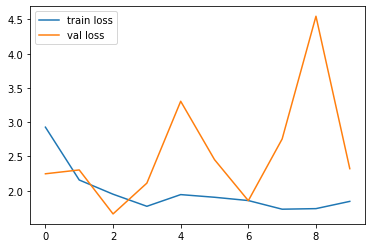

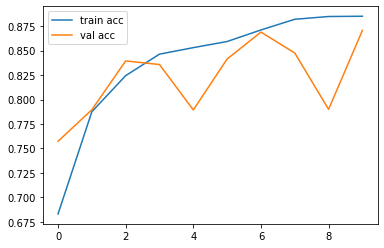

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [25]:

y_pred = model.predict(test_set)

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
img=image.load_img('test_image.jfif',target_size=(224,224))

In [31]:

x=image.img_to_array(img)
x

array([[[47., 68., 27.],
        [42., 58., 22.],
        [31., 43., 19.],
        ...,
        [41., 90., 35.],
        [35., 84., 28.],
        [36., 86., 27.]],

       [[48., 70., 24.],
        [41., 58., 22.],
        [31., 45., 22.],
        ...,
        [32., 82., 23.],
        [31., 74., 18.],
        [26., 74., 16.]],

       [[51., 74., 30.],
        [47., 61., 26.],
        [27., 45., 21.],
        ...,
        [25., 75., 16.],
        [22., 72., 13.],
        [20., 70., 11.]],

       ...,

       [[40., 65.,  0.],
        [36., 67.,  0.],
        [39., 70.,  3.],
        ...,
        [18., 27.,  6.],
        [17., 26.,  5.],
        [16., 25.,  4.]],

       [[47., 74.,  3.],
        [42., 76.,  0.],
        [44., 76.,  0.],
        ...,
        [18., 26.,  3.],
        [20., 28.,  5.],
        [14., 30.,  4.]],

       [[44., 74.,  0.],
        [45., 75.,  1.],
        [49., 77.,  3.],
        ...,
        [14., 27.,  1.],
        [15., 27.,  3.],
        [14., 26.,  4.]]

In [32]:

x.shape

(224, 224, 3)

In [33]:

x=x/255


In [34]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape


(1, 224, 224, 3)

In [35]:
model.predict(img_data)


array([[1.0830039e-23, 6.2220461e-05, 9.9993539e-01, 8.7819699e-12,
        2.8867598e-12, 2.2815503e-13, 8.1510293e-16, 5.2549835e-21,
        2.3283803e-06, 1.5118878e-11]], dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis=1)


In [37]:
a==1

array([False])